In [232]:
import math
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
from torch.autograd import Variable
import sys
sys.path.append("..")
import autoaim


# Devices
if torch.cuda.is_available():
    device = torch.device('cuda')
    print('Device: GPU.')
else:
    device = torch.device('cpu')
    print('Device: CPU.')

# Dataset
header, data = autoaim.DataLoader('test.csv').read_csv()
data = torch.Tensor(data).to(device)
x_train = data[:, :-1]
max = torch.max(x_train,0)[0]
min = torch.min(x_train,0)[0]
x_train = (x_train-min)/(max-min)
y_train = data[:, -1:]

test_data = torch.Tensor([
    [1.2/50, 0.0, 0.905],
    [0.0186, 0.844, 0.8571]
]).to(device)

# Parameter
epoch_num = 20000
learning_rate = 0.01
train_dataset_size = x_train.size(0)
input_size = x_train.size(1)
output_size = 1

print('====== Config ======')
print('input_size: {}'.format(input_size))

# Model

def forward(x):
    constant_term = torch.ones(x.size()[0], 1, device=device)
    _x = torch.cat((x, constant_term), 1)
    y_pred = _x.mm(w)
    y_pred = torch.sigmoid(_x.mm(w))
    return y_pred

# Loss function


def loss(x, y):
    y_pred = forward(x)
#   return ((y_pred - y) * (y_pred - y)).sum() + (w*w).abs().sum()
    return ((y_pred - y) * (y_pred - y)).sum()

Device: CPU.
====== Config ======
input_size: 3


In [233]:
# Weight (plus one for constant term)
w = torch.rand((input_size + 1, output_size), requires_grad=True, device=device)
# w = Variable(torch.Tensor([[1],[-0.5]]), requires_grad=True).to(device)

# Training loop
for epoch in range(epoch_num):
    l = loss(x_train, y_train)
    l.backward()
    w.data = w.data - learning_rate * w.grad.data

    if epoch == 0 or (epoch+1) % (epoch_num/10) == 0:
        print("progress: {!s:4}, loss: {:.2f}".format(epoch+1, l.data))
    w.grad.data.zero_()

progress: 1   , loss: 31.96
progress: 2000, loss: 9.25
progress: 4000, loss: 8.85
progress: 6000, loss: 8.66
progress: 8000, loss: 8.54
progress: 10000, loss: 8.46
progress: 12000, loss: 8.40
progress: 14000, loss: 8.35
progress: 16000, loss: 8.32
progress: 18000, loss: 8.29
progress: 20000, loss: 8.26


Data Distribution


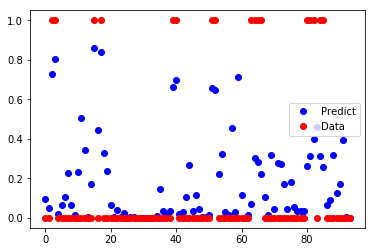

Weight
 tensor([[-16.2170],
        [ -1.0296],
        [  6.6155],
        [ -4.3682]], requires_grad=True), [0.6603017]


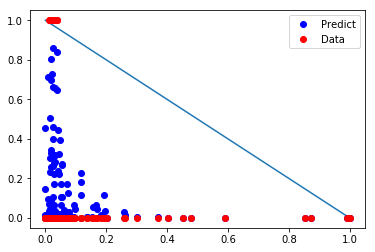

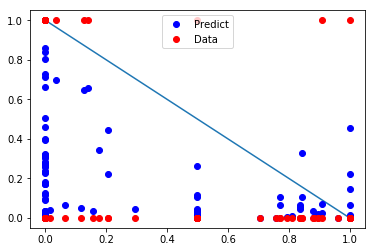

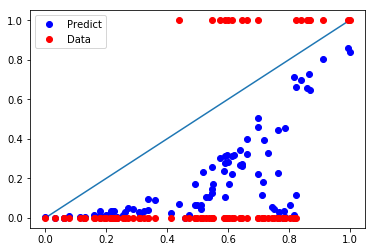

In [250]:
# Plot
with torch.no_grad():
    correct = 0
    total = 0
    y_pred = forward(x_train)
    # Move data to CPU
    device_cpu = torch.device('cpu')
    y_pred_plot = y_pred.to(device_cpu).numpy()
    y_train_plot = y_train.to(device_cpu).numpy()
    x_train_plot = x_train.to(device_cpu).numpy()
    _ = np.where(y_train.to(device_cpu).numpy()==1)
    x_train_true_plot = x_train[_].to(device_cpu).numpy()
    _ = np.where(y_train.to(device_cpu).numpy()==0)
    x_train_false_plot = x_train[_].to(device_cpu).numpy()
    # Test Sample
    print('Data Distribution')
    x = np.arange(0, 20, dtype=int)
    x = np.arange(0, train_dataset_size, dtype=int)
    plt.plot(x, y_pred_plot[x,:], 'bo', label='Predict')
    plt.plot(x, y_train_plot[x,:], 'ro', label='Data')
    plt.legend()
    plt.show()
    # Weight
    print('Weight\n {}, {}'.format(w,(-b)/a))
    x = np.linspace(0,1)
    _w = w.detach().numpy()
    b = _w[-1]
    for i in range(input_size):
        a = _w[i]
        y = a*x+b
        plt.plot(x,(y-y.min())/(y.max()-y.min()), linestyle='-')
        plt.plot(x_train_plot[:, i], y_pred_plot, 'bo', label='Predict')
        plt.plot(x_train_plot[:, i], y_train_plot, 'ro', label='Data')
        plt.legend()
        plt.show()

In [236]:
# Hepler: Sort the data by label
header, data = autoaim.DataLoader('test.csv').read_csv()
data = torch.Tensor(data).to(device)
index = data.sort(0,descending=True)[1][:,1]
# print(data[index])